In [1]:
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt
import json
import os
import shutil
import pickle as pkl

Has 2 runs.


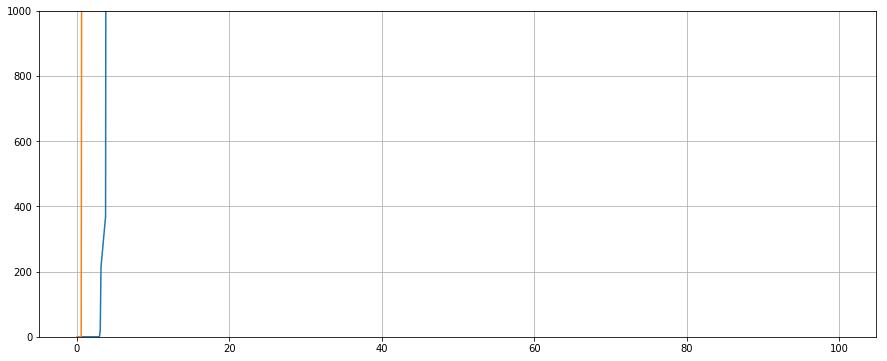

In [65]:
fig, ax = plt.subplots(figsize=(15, 6))

data = {}

i = 0
for k in range(20):
    d = 'experiment_{}'.format(k)
    results_dir = os.path.join(d, 'results')
    for gt_path in os.listdir(results_dir):
        if not gt_path.startswith("gt_eval"):
            continue
        with open(os.path.join(results_dir, gt_path), 'r') as o:
            gt_eval = json.load(o)
        
        keys = gt_eval.keys()
        position_error = [gt_eval[k]['p_B_G']['error_norm'] + 0 for k in keys]
        items = sorted(zip(keys, position_error), key=lambda x: float(x[0]))
        plt.plot([float(k[0]) for k in items], [float(k[1]) for k in items], label='{}:{}'.format(d, gt_path))
        data[(d, gt_path)] = (keys, position_error)
        i += 1

print("Has {} runs.".format(i))
ax.set_ylim(0, 1000)
#ax.set_yscale('log')
ax.grid(which='major')
ax.grid(which='minor', linestyle='--')

In [9]:
data[list(data.keys())[0]]

([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 [0.00318306970484414,
  0.00318304329508931,
  0.00318301954599317,
  0.00318299977799446,
  0.00318298529951329,
  0.00325010522232281,
  0.00315945823313354,
  0.00255934419833025,
  0.00174041014184781])

('experiment_0', 'gt_eval_2308_20.json')
('experiment_0', 'gt_eval_295_20.json')
('experiment_0', 'gt_eval_3015_20.json')
('experiment_0', 'gt_eval_3176_20.json')
('experiment_1', 'gt_eval_2308_20.json')
('experiment_1', 'gt_eval_295_20.json')
('experiment_1', 'gt_eval_3015_20.json')
('experiment_1', 'gt_eval_3176_20.json')
('experiment_2', 'gt_eval_2308_20.json')
('experiment_2', 'gt_eval_295_20.json')
('experiment_2', 'gt_eval_3015_20.json')
('experiment_2', 'gt_eval_3176_20.json')
('experiment_3', 'gt_eval_2308_20.json')
('experiment_3', 'gt_eval_295_20.json')
('experiment_3', 'gt_eval_3015_20.json')
('experiment_3', 'gt_eval_3176_20.json')
('experiment_4', 'gt_eval_2308_20.json')
('experiment_4', 'gt_eval_295_20.json')
('experiment_4', 'gt_eval_3015_20.json')
('experiment_4', 'gt_eval_3176_20.json')
('experiment_5', 'gt_eval_2308_20.json')
('experiment_5', 'gt_eval_295_20.json')
('experiment_5', 'gt_eval_3015_20.json')
('experiment_5', 'gt_eval_3176_20.json')
('experiment_6', 'gt_e

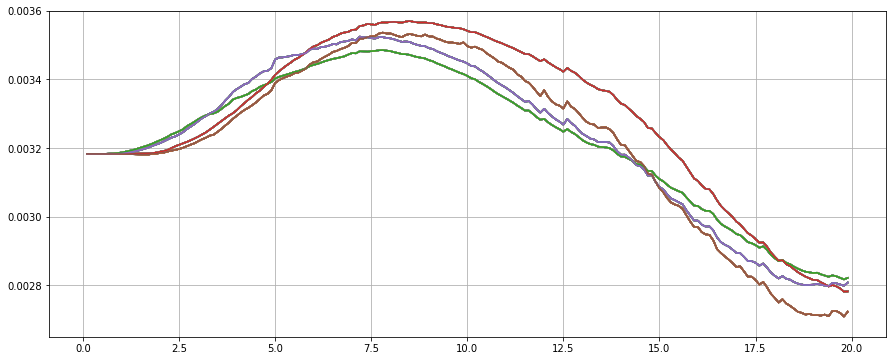

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))

good_runs = []

k = 0
for (d, gt_path), (keys, position_error) in data.items():
    m = max(keys)
    if m < 19:
        continue
    pts = {k:p for k,p in zip(keys, position_error)}
    final_error = pts[m]
    if not (0.0027 <= final_error <= 0.0029):
        continue
    items = sorted(zip(keys, position_error), key=lambda x: x[0])
    plt.plot([i[0] for i in items], [i[1] for i in items], label='{}:{}'.format(d, gt_path))
    print((d, gt_path))
    good_runs.append((d, gt_path))
    k += 1

ax.set_ylim(0.00265, 0.0036)
#ax.set_yscale('log')
ax.grid(which='major')
ax.grid(which='minor', linestyle='--')

In [45]:
good_runs

[('experiment_0', 'gt_eval_2308_20.json'),
 ('experiment_0', 'gt_eval_295_20.json'),
 ('experiment_0', 'gt_eval_3015_20.json'),
 ('experiment_0', 'gt_eval_3176_20.json'),
 ('experiment_1', 'gt_eval_2308_20.json'),
 ('experiment_1', 'gt_eval_295_20.json'),
 ('experiment_1', 'gt_eval_3015_20.json'),
 ('experiment_1', 'gt_eval_3176_20.json'),
 ('experiment_2', 'gt_eval_2308_20.json'),
 ('experiment_2', 'gt_eval_295_20.json'),
 ('experiment_2', 'gt_eval_3015_20.json'),
 ('experiment_2', 'gt_eval_3176_20.json'),
 ('experiment_3', 'gt_eval_2308_20.json'),
 ('experiment_3', 'gt_eval_295_20.json'),
 ('experiment_3', 'gt_eval_3015_20.json'),
 ('experiment_3', 'gt_eval_3176_20.json'),
 ('experiment_4', 'gt_eval_2308_20.json'),
 ('experiment_4', 'gt_eval_295_20.json'),
 ('experiment_4', 'gt_eval_3015_20.json'),
 ('experiment_4', 'gt_eval_3176_20.json'),
 ('experiment_5', 'gt_eval_2308_20.json'),
 ('experiment_5', 'gt_eval_295_20.json'),
 ('experiment_5', 'gt_eval_3015_20.json'),
 ('experiment_5',

In [46]:
for d, gt_path in good_runs:
    fname = "tonav_params_" + gt_path[len("gt_eval_"):]
    shutil.copyfile(os.path.join(d, 'results', fname), 'good/' + fname)